In [1]:
#!pip freeze > ../requests.txt
#!pip install sklearn
#!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
PATH1 = "../data/Desafio de Dados FieldPRO/Sensor_FieldPRO.csv"
PATH2 = "../data/Desafio de Dados FieldPRO/Estacao_Convencional.csv"

sensor_df = pd.read_csv(PATH1)
estacao_df = pd.read_csv(PATH2)

In [4]:
sensor_df.shape, sensor_df.columns

((1711, 7),
 Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
        'atm_pressure_main', 'num_of_resets', 'piezo_charge',
        'piezo_temperature'],
       dtype='object'))

In [5]:
estacao_df.shape, estacao_df.columns

((2256, 3), Index(['data', 'Hora (Brasília)', 'chuva'], dtype='object'))

In [6]:
sensor_df.isna().sum()
#sensor_df[sensor_df.air_humidity_100.isna()]
#sensor_df[sensor_df.num_of_resets.eq(3)]

Datetime – utc         0
air_humidity_100       6
air_temperature_100    6
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
dtype: int64

In [7]:
sensor_df['data'] = pd.to_datetime(sensor_df['Datetime – utc'], format='mixed')

In [8]:
sensor_df['data'] = sensor_df.data.astype(str).str.split('+',expand=True)[0]

In [9]:
sensor_df.data

0       2020-09-30 23:00:00
1       2020-10-01 00:00:00
2       2020-10-01 01:00:00
3       2020-10-01 02:00:00
4       2020-10-01 03:00:00
               ...         
1706    2020-12-11 09:00:00
1707    2020-12-11 10:00:00
1708    2020-12-11 11:00:00
1709    2020-12-11 12:00:00
1710    2020-12-11 13:00:00
Name: data, Length: 1711, dtype: object

In [10]:
estacao_df#.isna().sum()
estacao_df['data'] = estacao_df.data + ' ' + estacao_df['Hora (Brasília)']

In [11]:
estacao_df

,data,Hora (Brasília),chuva
0,2020-09-01 00:00:00,00:00:00,0.0
1,2020-09-01 01:00:00,01:00:00,0.0
2,2020-09-01 02:00:00,02:00:00,0.0
3,2020-09-01 03:00:00,03:00:00,0.0
4,2020-09-01 04:00:00,04:00:00,0.0
...,...,...,...
2251,2020-12-03 19:00:00,19:00:00,0.0
2252,2020-12-03 20:00:00,20:00:00,0.0
2253,2020-12-03 21:00:00,21:00:00,0.0
2254,2020-12-03 22:00:00,22:00:00,0.0


In [12]:
dados_df = pd.merge(sensor_df,estacao_df[['data','chuva']], on='data')

In [13]:
dados_df.dropna(inplace=True)

In [14]:
dados_df.chuva.unique()

array([ 0. ,  0.2,  1.2,  2.2,  9.2,  4. ,  0.4,  1.6,  0.8,  0.6,  3. ,
        1.8,  5.6,  2.4,  2.8, 16.8,  3.6,  4.2,  3.4,  2. ,  6.8,  6.2,
        3.8,  4.6,  1. , 15.2,  8.2])

<Axes: >

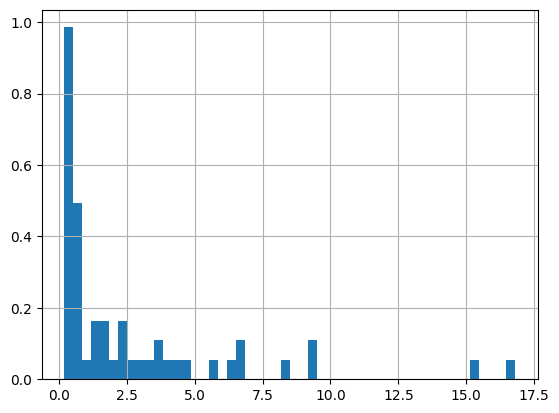

In [15]:
#dados_df.chuva.hist(density=True, bins=20)
dados_df[~dados_df.chuva.eq(0)].chuva.hist(density=True, bins=50)

<Axes: >

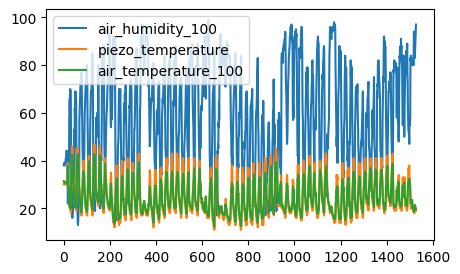

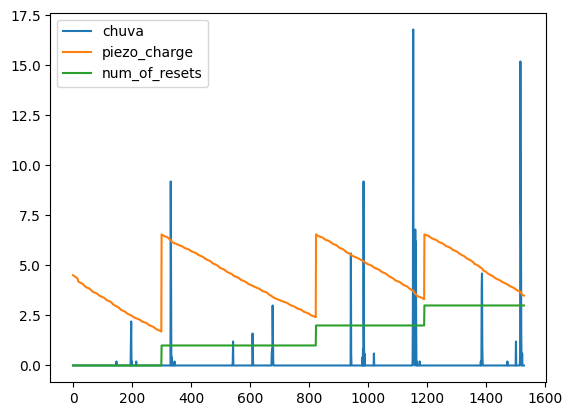

In [16]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
dados_df[['air_humidity_100']].plot(ax=ax)
dados_df[['piezo_temperature']].plot(ax=ax)
dados_df[['air_temperature_100']].plot(ax=ax)

#plt.subplot(122)
ax2 = dados_df[['chuva']].plot()
(dados_df[['piezo_charge']]/10000).plot(ax=ax2)
dados_df[['num_of_resets']].plot(ax=ax2)


#ax = plt.hist(sensor_df.piezo_charge)

In [17]:
dados_df['dif_charge'] = dados_df.groupby('num_of_resets').piezo_charge.diff(-1)
dados_df.dropna(inplace=True)
#dados_df['dif_charge'] = 100*dados_df['dif_charge']/dados_df['piezo_charge']
#aux = dados_df[dados_df.num_of_resets.eq(1)]
#aux.piezo_charge.diff(-1)

In [18]:
dados_df.isna().sum()

Datetime – utc         0
air_humidity_100       0
air_temperature_100    0
atm_pressure_main      0
num_of_resets          0
piezo_charge           0
piezo_temperature      0
data                   0
chuva                  0
dif_charge             0
dtype: int64

<Axes: >

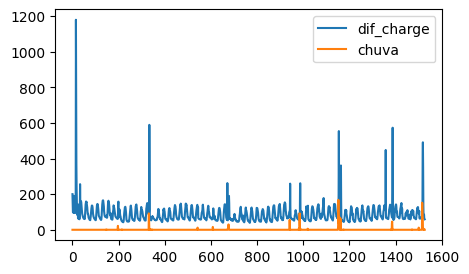

In [19]:
fig, ax = plt.subplots(figsize=(5,3))
#plt.subplot(121)
(dados_df[['dif_charge']]).plot(ax=ax)
#dados_df[['piezo_temperature']].plot(ax=ax)
#dados_df[['air_temperature_100']].plot(ax=ax)

#plt.subplot(122)
(dados_df[['chuva']]*10).plot(ax=ax)
#(dados_df[['piezo_charge']]/10000).plot(ax=ax2)
#dados_df[['num_of_resets']].plot(ax=ax2)


#ax = plt.hist(sensor_df.piezo_charge)

#ax = dados_df.loc[810:1100].chuva.plot()
#(dados_df.loc[810:1100,['piezo_charge']]/10000).plot(ax=ax)
sns.scatterplot(data=dados_df.loc[810:1100], x='piezo_charge', y='chuva', hue='num_of_resets')

In [20]:
dados_df[['piezo_temperature','air_temperature_100']]
dados_df['dif_temp'] = dados_df['air_temperature_100'] - dados_df['piezo_temperature'].astype(float)

dados_df['extra'] = dados_df.dif_temp*dados_df.dif_charge

In [21]:
dados_df['precp'] = dados_df.chuva.apply(lambda x: 0 if x==0.0 else 1 if x<= 1 else 2 if x<=2.5 else 3)

In [22]:
dados_df

,Datetime – utc,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,data,chuva,dif_charge,dif_temp,extra,precp
0,2020-09-30T23:00:00Z,38.0,31.366,9412,0,45123,30,2020-09-30 23:00:00,0.0,200.0,1.366,273.200,0
2,2020-10-01T01:00:00Z,39.0,31.366,9419,0,44923,31,2020-10-01 01:00:00,0.0,98.0,0.366,35.868,0
3,2020-10-01T02:00:00Z,39.0,31.322,9419,0,44825,31,2020-10-01 02:00:00,0.0,97.0,0.322,31.234,0
4,2020-10-01T03:00:00Z,38.0,31.240,9416,0,44728,31,2020-10-01 03:00:00,0.0,96.0,0.240,23.040,0
5,2020-10-01T04:00:00Z,39.0,30.828,9411,0,44632,30,2020-10-01 04:00:00,0.0,191.0,0.828,158.148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,2020-12-03T18:00:00Z,83.0,21.420,9413,3,35287,20,2020-12-03 18:00:00,0.0,70.0,1.420,99.400,0
1523,2020-12-03T19:00:00Z,86.0,20.880,9412,3,35217,20,2020-12-03 19:00:00,0.0,85.0,0.880,74.800,0
1524,2020-12-03T20:00:00Z,90.0,20.980,9409,3,35132,19,2020-12-03 20:00:00,0.0,64.0,1.980,126.720,0
1525,2020-12-03T21:00:00Z,93.0,20.620,9408,3,35068,20,2020-12-03 21:00:00,0.0,61.0,0.620,37.820,0


import seaborn as sns

sns.heatmap(dados_df.corr(), annot=True)

# Calibrator

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier

In [24]:
dados_df.columns


Index(['Datetime – utc', 'air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'data', 'chuva', 'dif_charge', 'dif_temp', 'extra',
       'precp'],
      dtype='object')

In [25]:
cols = ['air_humidity_100', 'air_temperature_100',
       'atm_pressure_main', 'num_of_resets', 'piezo_charge',
       'piezo_temperature', 'dif_charge', 'dif_temp', 'precp']

In [27]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

In [28]:
#X = dados_df.loc[~dados_df.chuva.eq(0),cols].copy()
X = dados_df[cols].copy()
y = X.pop('precp')
#y = 100*y 

In [29]:
X.columns

Index(['air_humidity_100', 'air_temperature_100', 'atm_pressure_main',
       'num_of_resets', 'piezo_charge', 'piezo_temperature', 'dif_charge',
       'dif_temp'],
      dtype='object')

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [31]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9385964912280702)

In [33]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       428
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        12

    accuracy                           0.94       456
   macro avg       0.23      0.25      0.24       456
weighted avg       0.88      0.94      0.91       456



c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [41]:
classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [42]:
classifier_XGB.score(X_train,y_train), classifier_XGB.score(X_test,y_test)
print(classification_report(y_test, classifier_XGB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       428
           1       0.25      0.08      0.12        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        12

    accuracy                           0.93       456
   macro avg       0.30      0.27      0.27       456
weighted avg       0.89      0.93      0.91       456



### Bootstraping Classifier

In [36]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [37]:
N = 3000

In [38]:
#df_aux = X_bst[~X_bst.precp.eq(0)]
for n in range(4):
    df_aux = X_bst[X_bst.precp.eq(n)]
    df_aux = df_aux.sample(n=N, replace=True)
    X_bst = pd.concat([X_bst,df_aux])
    

In [39]:
df_aux

,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,dif_charge,dif_temp,precp
331,62.0,24.46,9420,1,62700,25,87.0,-0.54,3
331,62.0,24.46,9420,1,62700,25,87.0,-0.54,3
331,62.0,24.46,9420,1,62700,25,87.0,-0.54,3
331,62.0,24.46,9420,1,62700,25,87.0,-0.54,3
676,87.0,18.66,9444,1,34406,18,110.0,0.66,3
...,...,...,...,...,...,...,...,...,...
332,63.0,23.58,9434,1,62613,23,108.0,0.58,3
984,96.0,18.68,9436,2,52204,18,94.0,0.68,3
676,87.0,18.66,9444,1,34406,18,110.0,0.66,3
676,87.0,18.66,9444,1,34406,18,110.0,0.66,3


In [ ]:
#X_bst = pd.concat([X_bst,df_aux])

In [ ]:
X_bst

,air_humidity_100,air_temperature_100,atm_pressure_main,num_of_resets,piezo_charge,piezo_temperature,dif_charge,dif_temp,precp
0,38.0,31.366,9412,0,45123,30,200.0,1.366,0
2,39.0,31.366,9419,0,44923,31,98.0,0.366,0
3,39.0,31.322,9419,0,44825,31,97.0,0.322,0
4,38.0,31.240,9416,0,44728,31,96.0,0.240,0
5,39.0,30.828,9411,0,44632,30,191.0,0.828,0
...,...,...,...,...,...,...,...,...,...
984,96.0,18.680,9436,2,52204,18,94.0,0.680,3
676,87.0,18.660,9444,1,34406,18,110.0,0.660,3
984,96.0,18.680,9436,2,52204,18,94.0,0.680,3
676,87.0,18.660,9444,1,34406,18,110.0,0.660,3


In [40]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [ ]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
classifier_RF.score(X_train,y_train), classifier_RF.score(X_test,y_test)

(1.0, 0.9364035087719298)

In [ ]:
#print(classification_report(y_train, classifier_RF.predict(X_train)))
print(classification_report(y_test, classifier_RF.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       428
           1       0.25      0.08      0.12        12
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        12

    accuracy                           0.94       456
   macro avg       0.30      0.27      0.27       456
weighted avg       0.89      0.94      0.91       456



c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

c:\Users\CarlosSolano.iel\Downloads\rain\.venv\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.988e+05, tolerance: 2.468e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

In [ ]:
lasso.score(X_train, y_train), lasso.score(X_test, y_test)

(0.007936192459231828, 0.007819845593537322)

In [ ]:
calibrador_RFR = make_pipeline(StandardScaler(),RandomForestRegressor())
calibrador_RFR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [ ]:
calibrador_RFR.score(X_train, y_train), calibrador_RFR.score(X_test, y_test)

(0.8240628427077882, 0.027873047667704487)

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

(0.8495673720344675, 0.02969547543879003)

In [ ]:
xboost = XGBRegressor()
xboost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
xboost.score(X_train, y_train), xboost.score(X_test, y_test)

(0.9998747568787105, -0.06659407835299991)

In [ ]:
calibrador_SVR = SVR()
calibrador_SVR.fit(X_train, y_train)

SVR()

In [ ]:
calibrador_SVR.score(X_train, y_train), calibrador_SVR.score(X_test, y_test)


(-0.01160658755718269, -0.016708137591585626)

In [ ]:
calibrador_SGD = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))

In [ ]:
#calibrador_SGD = SGDRegressor()
calibrador_SGD.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [ ]:
calibrador_SGD.score(X_train, y_train), calibrador_SGD.score(X_test, y_test)

(0.04435596736246028, 0.031173255921132403)

### Bootstrap

In [ ]:
X_bst = pd.concat([X_train, y_train], axis=1)

In [ ]:
N = 2000

X_bst = X_bst.sample(n=N, replace=True)

y_train = X_bst.pop('chuva')
X_train = X_bst

calibrador_RF = RandomForestRegressor(random_state=42, bootstrap=True)
calibrador_RF.fit(X_train, y_train)

calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador_RF.predict(X_test))

In [ ]:
df_aux = X_bst[~X_bst.precp.eq(0)]
df_aux = df_aux.sample(n=N, replace=True)

In [ ]:
X_bst = pd.concat([X_bst,df_aux], ignore_index=True)

In [ ]:
y_train = X_bst.pop('precp')
X_train = X_bst

In [ ]:
df_aux = X_bst[~X_bst.chuva.eq(0)]
df_aux = df_aux.sample(n=N, replace=True)

In [ ]:
X_bst = pd.concat([X_bst,df_aux], ignore_index=True)

In [ ]:
y_train = X_bst.pop('chuva')
X_train = X_bst

In [ ]:
calibrador_RF = RandomForestRegressor(random_state=42)
calibrador_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
calibrador_RF.score(X_train, y_train), calibrador_RF.score(X_test, y_test)
#r2_score(y_test, calibrador.predict(X_test))

(0.9991185345261194, -0.015140294812167276)